In [6]:
from datasets import load_dataset
import datasets

dataset_vi: datasets.IterableDataset = load_dataset(
    "thng292/fineweb-subset-1M",
    "subset-vi",
    split="test",
    streaming=True,
) # type: ignore
dataset_en: datasets.IterableDataset = load_dataset(
    "thng292/fineweb-subset-1M",
    "subset-en",
    split="test",
    streaming=True,
) # type: ignore

In [7]:
from transformers import AutoTokenizer, PreTrainedTokenizerBase

models = [
    "google-bert/bert-base-multilingual-cased",
    "google/gemma-3-270m-it",
    "Qwen/Qwen3-0.6B",
    "openai/gpt-oss-20b",
    "unsloth/Llama-3.1-8B-Instruct",
    # "mistralai/Magistral-Small-2507",
    "thng292/fineweb-vi-en-tokenizer",
]
tokenizers: dict[str, PreTrainedTokenizerBase] = {
    model: AutoTokenizer.from_pretrained(model) for model in models
}

In [13]:
# Benchmark tokenizers on both datasets
import time
import pandas as pd
import matplotlib.pyplot as plt

def benchmark_tokenizer(tokenizer, dataset, n_samples=1000):
    lengths = []
    times = []
    for i, sample in enumerate(dataset):
        if i >= n_samples:
            break
        text = sample.get('text', '')
        start = time.time()
        tokens = tokenizer.encode(text)
        elapsed = time.time() - start
        lengths.append(len(tokens))
        times.append(elapsed)
    return {
        'avg_length': sum(lengths) / len(lengths),
        'avg_time': sum(times) / len(times),
        'lengths': lengths,
        'times': times
    }

results = []
for lang, dataset in [('vi', dataset_vi), ('en', dataset_en)]:
    for name, tokenizer in tokenizers.items():
        stats = benchmark_tokenizer(tokenizer, dataset)
        results.append({
            'model': name.split('/')[-1],
            'lang': lang,
            'avg_length': stats['avg_length'],
            'avg_time': stats['avg_time']
        })

df = pd.DataFrame(results)

/tmp/ipykernel_58842/3825662436.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['model'] + ' (' + df['lang'] + ')', rotation=45, ha='right')


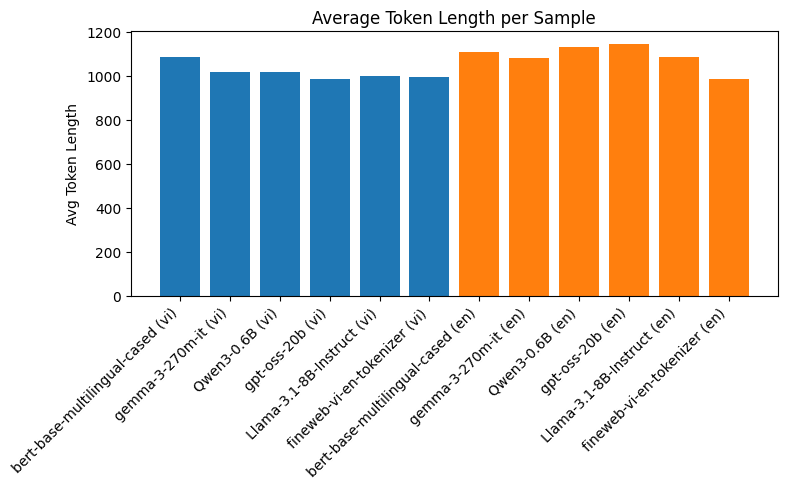

In [22]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
for lang, group in df.groupby('lang'):
    ax.bar(group['model'] + ' (' + lang + ')', group['avg_length'], label=lang)
ax.set_title('Average Token Length per Sample')
ax.set_ylabel('Avg Token Length')
ax.set_xticklabels(df['model'] + ' (' + df['lang'] + ')', rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_58842/2040304646.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df['model'] + ' (' + df['lang'] + ')', rotation=90, ha='right')
/tmp/ipykernel_58842/2040304646.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(df['model'] + ' (' + df['lang'] + ')', rotation=90, ha='right')


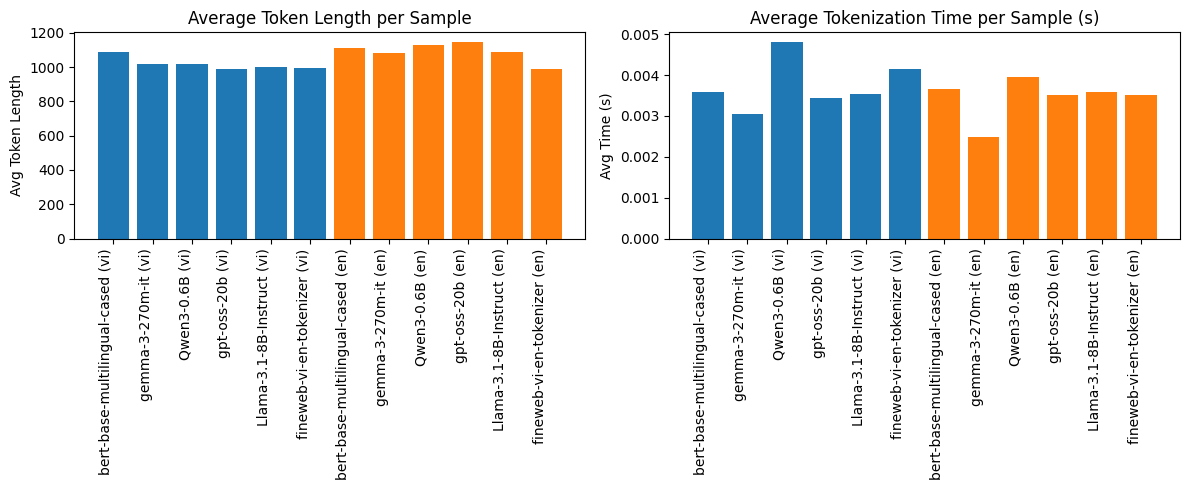

In [17]:
# Plotting (AI Generated)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for lang, group in df.groupby('lang'):
    ax[0].bar(group['model'] + ' (' + lang + ')', group['avg_length'], label=lang)
    ax[1].bar(group['model'] + ' (' + lang + ')', group['avg_time'], label=lang)
ax[0].set_title('Average Token Length per Sample')
ax[0].set_ylabel('Avg Token Length')
ax[0].set_xticklabels(df['model'] + ' (' + df['lang'] + ')', rotation=90, ha='right')
ax[1].set_title('Average Tokenization Time per Sample (s)')
ax[1].set_ylabel('Avg Time (s)')
ax[1].set_xticklabels(df['model'] + ' (' + df['lang'] + ')', rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Tokenizer Benchmark Insights (AI generated)
The above graph compares the average token length and tokenization speed for each tokenizer on both Vietnamese and English datasets.

**Key Insights:**
- The tokenizer `thng292/fineweb-vi-en-tokenizer` is specifically designed for Vietnamese and English, and its performance can be directly compared to general-purpose models.
- Shorter average token length may indicate more efficient tokenization, while lower average time means faster processing.
- Consider both metrics when choosing a tokenizer for large-scale or real-time applications.

**Recommendations:**
- If your use case is focused on Vietnamese and English, `thng292/fineweb-vi-en-tokenizer` may offer advantages in speed and token efficiency.
- For multilingual or general tasks, other models may be more suitable depending on the observed results above.

Review the bar charts to select the best tokenizer for your needs.